In [1]:
import sys
sys.path.append('../codes')
import utils.hyperbolic_utils as hyp
import torch
import matplotlib.pyplot as plt
import numpy as np


tensor([0.9133, 0.4072]) tensor([0.9489, 0.3156]) tensor(1.) tensor(1.)


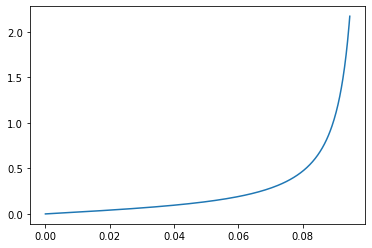

In [28]:
c = torch.arange(200) * 0.01
curvature = 1.0
hyp_dist = []
norm = []
x = torch.rand(2,)
x /= x.norm()
y = torch.rand(2, )
y /= y.norm()


print(x, y, x.norm(), y.norm())
for i in range(c.shape[0]):
    _x = hyp.proj(hyp.expmap0(x * c[i], c=curvature), curvature)
    _y = hyp.proj(hyp.expmap0(y * c[i], c=curvature), curvature)
    d = hyp.sqdist(_x, _y, c=curvature) ** 0.5
    hyp_dist.append(d)
    diff = _x - _y
    norm.append(diff.norm())
    # print(c[i])
    
plt.plot(norm, hyp_dist)


tensor([0.0052, 0.0071]) tensor([0.0007, 0.0034])


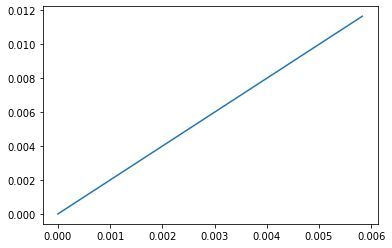

In [55]:
x = torch.rand(2, ) * 0.01
# x = x / (x.norm() + 1e-5)
y = torch.rand(2, ) * 0.01
# y = y / (y.norm() + 1e-5)
v = y - x
v_norm = v.norm()
v = v / v_norm
curvature = 0.1
num_points = 10
print(x, y)

x_hyp = hyp.proj(hyp.expmap0(x, c=curvature), curvature)

norm = np.linspace(0, v_norm, num_points)
distance = []
for i in range(num_points):
    xy = x + v * norm[i]
    xy_hyp = hyp.proj(hyp.expmap0(xy, c=curvature), curvature)
    # print((xy - x).norm(), norm[i])
    d = hyp.sqdist(x_hyp, xy_hyp, c=curvature) ** 0.5
    distance.append(d)

plt.plot(norm, distance)
    

